## Project 5 - Complex Network Notebook

In [1]:
from p5_utils import *
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
N = 10000
c = 50
m = 100
L = int((N / 2) * c)

# uses last iteration data such as last network, last degrees, etc.. for later
avg_degree, P_degree, last_A, last_q = average_degree(N, L, m)

### Task 1 - Mean degree, branching coefficient, second and third moments

In [3]:
B = branching_coeff(avg_degree, P_degree)

# uses degrees of last iteration from averaging samples for moments
print(f'2nd moment: {moment(N, last_q, 2)}')
print(f'3rd moment: {moment(N, last_q, 3)}')
print(f'B/avg_q = {B / avg_degree} ~ 1')

# Average degree, and B
print(f'<q> = c: {avg_degree} = {c}')
print(f'B = c: {B} = {c}')

2nd moment: 2536.9084000000003
3rd moment: 131514.6794
B/avg_q = 0.9998868759692466 ~ 1
<q> = c: 49.874973999999995 = 50
B = c: 49.8693319419074 = 50


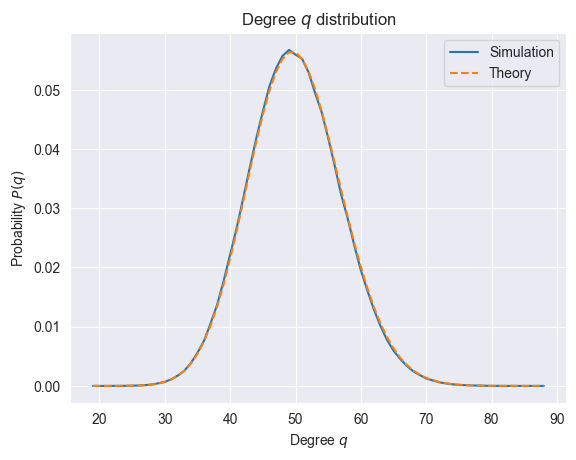

In [4]:
theory_P = [P_theory(q, c) for q in P_degree.keys()]

sns.lineplot(x = P_degree.keys(), y = P_degree.values(), label = 'Simulation')
sns.lineplot(x = P_degree.keys(), y = theory_P, label = 'Theory', linestyle = 'dashed')
plt.title('Degree $q$ distribution')
plt.xlabel('Degree $q$')
plt.ylabel('Probability $P(q)$')
plt.show()

### Task 2 - Clustering Coefficient

In [5]:
# Need to get a new network since previous ones were used to obtain averages
cluster = cluster_coeff(last_A, last_q)

print(f'C ~ <q>/N: {cluster} ~ {np.sum(last_q) / (N ** 2)}')

C ~ <q>/N: 0.004946369497959057 ~ 0.00498722


### Task 3 - Degree-Degree Pearson Correlation 

In [6]:
pearson = pearson_corr(last_A, last_q, N)
print(f'Pearson coefficient: {pearson} ~ 0') # high pearson coeff?? not computed correctly maybe

Pearson coefficient: -0.0003052243864402961 ~ 0


### Graph visualization using *networkx*

In [7]:
import networkx as nx

graph = nx.from_numpy_array(last_A)

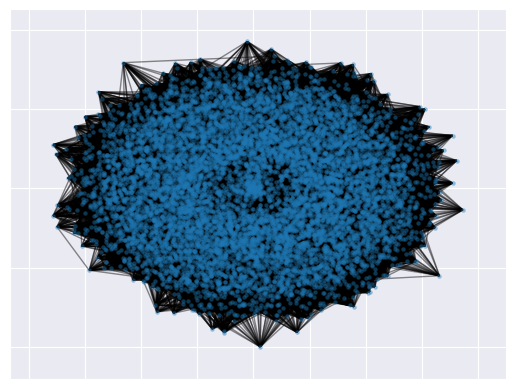

In [10]:
nx.draw_networkx(graph, node_size = 10, with_labels = False, linewidths = 0.01, alpha = 0.45)